<a href="https://colab.research.google.com/github/manavtech07/Content-Based-Recommendation-System/blob/main/content_based_rec_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES AND LOAD MODELS

In [14]:
import pandas as pd
import numpy as np
import pickle
# Importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
import torch
import missingno
import html
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
!pip install -U sentence-transformers
!pip install bs4
from sentence_transformers import SentenceTransformer, util
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d1fbc80baa20d692150a3e43c47b6f595665f773616316f961894fe304f26073
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: f

#LOADING DATASET

In [2]:
import gdown
urls = {
    "products.csv": "1w6uaiwUgZgMvRCi8xnbpZQYZxg_SX3jo",

}

for name, id in urls.items():
    url = f"https://drive.google.com/uc?id={id}"
    output = f"/content/{name}"
    gdown.download(url, output, quiet=False)
    print(f"Loaded {name}")

Downloading...
From: https://drive.google.com/uc?id=1w6uaiwUgZgMvRCi8xnbpZQYZxg_SX3jo
To: /content/products.csv
100%|██████████| 38.1M/38.1M [00:01<00:00, 30.7MB/s]

Loaded products.csv


In [3]:
df = pd.read_csv('products.csv')

In [4]:
df.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

#PREPROCESSING DATA

In [5]:
# Remove nan values
df['brand'].fillna(value='', inplace=True)

#Removing duplicates
df['name2'] = df['product_name'].str.lower().str.replace(" ", "")
df['brand2'] = df['brand'].str.lower().str.replace(" ", '')


df = df.drop_duplicates(subset=['name2', 'brand2', 'retail_price'], keep='first')

#product_category
df['product_category_tree'] = df['product_category_tree'].str.replace(">>", ",")

# Remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['description'] = df['description'].astype(str).apply(remove_stopwords)

def extract_keys(row):
    if isinstance(row, list):  # Check if the row is a list
        return [item["key"] for item in row if isinstance(item, dict) and "key" in item]
    else:
        return []

# Apply the function to create a new column 'key_list'
df['key_list'] = df['product_specifications'].apply(extract_keys)

# Combine text columns into 'soup'
text_columns = ['product_category_tree', 'description', 'product_name', 'brand', 'key_list']
df['soup'] = df[text_columns].astype(str).apply(' '.join, axis=1)

#VISUALISATION

<Axes: >

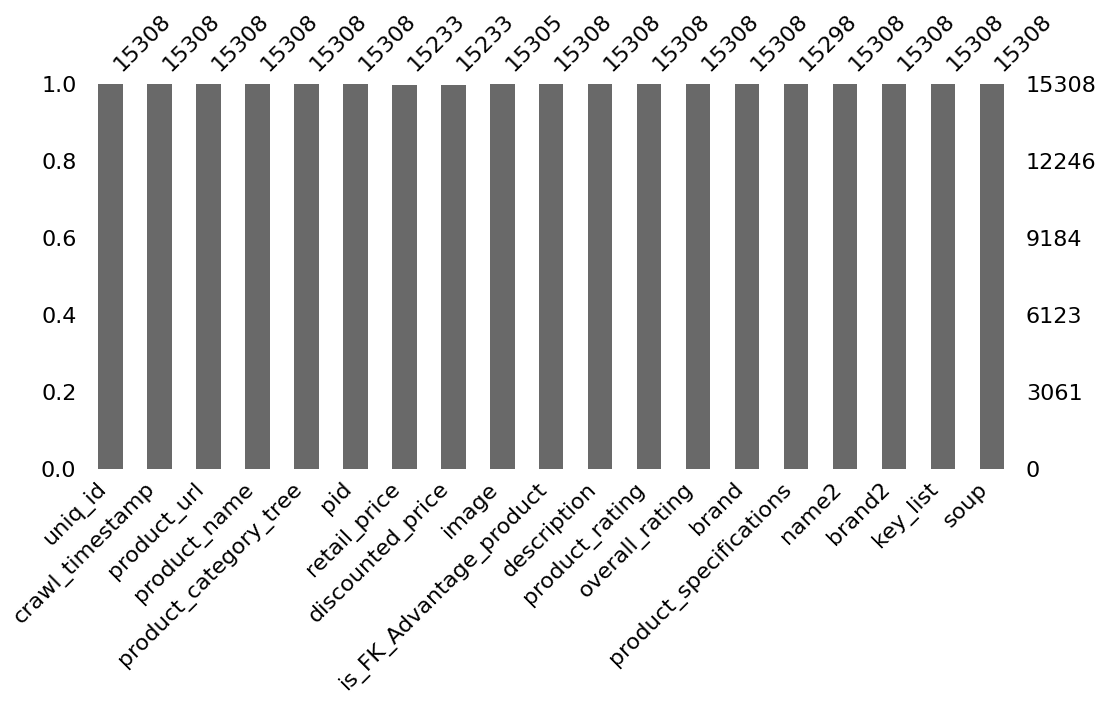

In [6]:
missingno.bar(df,figsize=(12,5))

#DATA MODELLING

In [15]:
model = SentenceTransformer('paraphrase-distilroberta-base-v1')
#new index
df['index'] = range(0, df.shape[0])
df = df.reset_index(drop=True)

##create embeddings

In [16]:
#soup consists of all dependecies for similarity
descriptions = df['soup'].tolist()

des_embeddings = []

for i,des in enumerate(descriptions):
    des_embeddings.append(model.encode(des))

#RECOMMENDATIONS

In [17]:
def recommend(query):
    #Compute cosine-similarities with all embeddings
    query_embedd = model.encode(query)
    cosine_scores = util.pytorch_cos_sim(query_embedd, des_embeddings)
    top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:8]
    return top5_matches

name = 'FabHomeDecor Fabric Double Sofa Bed'
query_show_des = df.loc[df['product_name'] == name]['soup'].to_list()[0]
recommendded_results = recommend(query_show_des)

for index in recommendded_results:
    print("->",df.iloc[index,[3, 6,7, 13]])

-> product_name        Durian Georgia Leatherette 1 Seater Sofa
retail_price                                         31200.0
discounted_price                                     20280.0
brand                                                 Durian
Name: 9289, dtype: object
-> product_name        Jaipur Print Cotton Floral King sized Double B...
retail_price                                                   2599.0
discounted_price                                                698.0
brand                                                    Jaipur Print
Name: 64, dtype: object
-> product_name        ARRA Solid Wood 4 Seater Sofa
retail_price                              43100.0
discounted_price                          43100.0
brand                                        ARRA
Name: 9515, dtype: object
-> product_name        Durian Leather 2 Seater Sofa
retail_price                            250500.0
discounted_price                        162825.0
brand                                    

In [45]:
from model_ import ProductRecommendation

In [46]:
#create an instance
recommender = ProductRecommendation()

# Fit the recommender with your data
recommender.fit(df)

In [47]:
# Make recommendations
product_name = 'FabHomeDecor Fabric Double Sofa Bed'
recommendations = recommender.predict(product_name)

for rec in recommendations:
    print("->", rec)

-> product_name        Durian Georgia Leatherette 1 Seater Sofa
retail_price                                         31200.0
discounted_price                                     20280.0
brand                                                 Durian
Name: 9289, dtype: object
-> product_name        Jaipur Print Cotton Floral King sized Double B...
retail_price                                                   2599.0
discounted_price                                                698.0
brand                                                    Jaipur Print
Name: 64, dtype: object
-> product_name        ARRA Solid Wood 4 Seater Sofa
retail_price                              43100.0
discounted_price                          43100.0
brand                                        ARRA
Name: 9515, dtype: object
-> product_name        Durian Leather 2 Seater Sofa
retail_price                            250500.0
discounted_price                        162825.0
brand                                    